# DeePC Experiment with L1 Regularization

## Create Simple Pendulum Environment for Experiment

In [1]:
from DrivenPendulum import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cont2discrete

%matplotlib inline

Ts = 0.1
pend = DrivenPendulum(0.1, 1)
sim = DrivenPendulumSimulator(pend, 0.1)

Xeq = np.array([[np.pi],
               [0]])

## LQR Controller for Stabilizing the Unstable Fixed Point

In [2]:
from Controller import *
A, B = pend.TopDynamics()
C = np.eye(2)
D = np.zeros((2,1))

(Ad, Bd, *s) = cont2discrete((A, B, C, D), Ts, method='bilinear')
ctrl1 = Controller(Ad, Bd, pend.m, pend.g, pend.l)

Q = np.eye(2)*10
R = np.eye(1)*0.1

K = ctrl1.K_LQR(Q, R)

## Trajectory 1: LQR Controller

In [3]:
X0 = Xeq + np.array([[-1],
                     [0]])
u0 = 0

full_state = np.squeeze(X0)
u = u0
timesteps = 100

traj_LQR1 = np.zeros((2, timesteps))
trajU_LQR1 = np.zeros((1, timesteps))

for i in range(timesteps):

    fs = full_state[:, np.newaxis]
    u_ctrl = np.squeeze(K@(fs - Xeq)) + np.random.normal(0, 0.1)
    u_ctrl = np.clip(u_ctrl, -1, 1)
    full_state = sim.step(full_state, u_ctrl)
    # print('Full State:', full_state)
    traj_LQR1[:, i] = full_state
    trajU_LQR1[:, i] = u_ctrl

### Plots

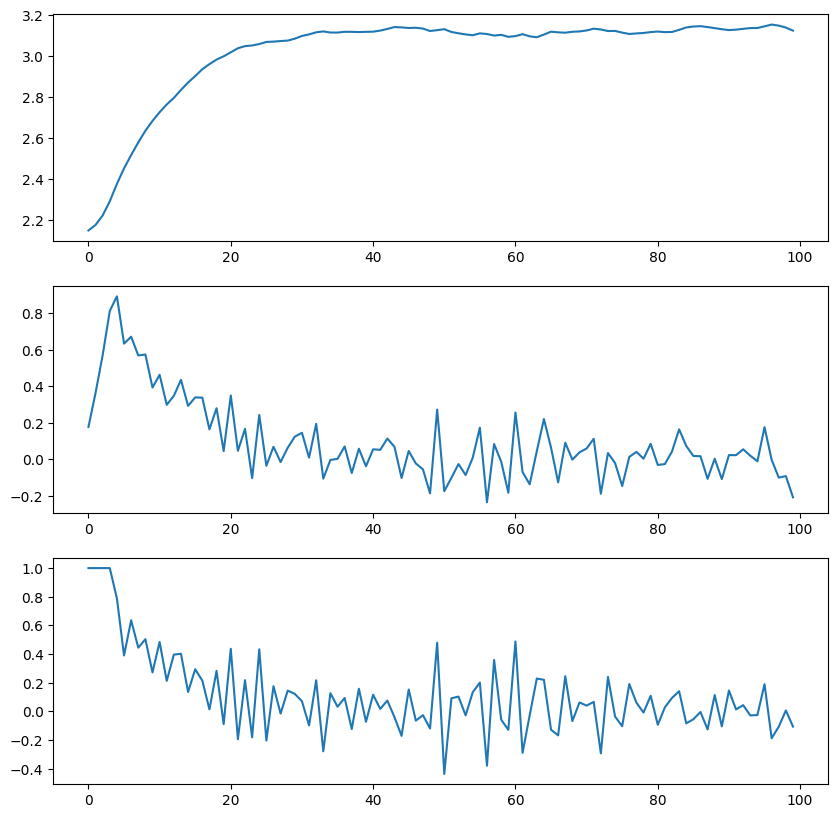

In [4]:
fig, axs = plt.subplots(3,1, figsize=(10, 10))
axs[0].plot(traj_LQR1[0, :])
axs[1].plot(traj_LQR1[1, :])
axs[2].plot(trajU_LQR1[0, :])

# Trajectory 2: Another LQR Controller

In [5]:
ctrl2 = Controller(Ad, Bd, pend.m, pend.g, pend.l)

Q = np.eye(2)*20
R = np.eye(1)*0.1

K = ctrl2.K_LQR(Q, R)

In [6]:
X0 = Xeq + np.array([[-0.5],
                     [0]])
u0 = 0

full_state = np.squeeze(X0)
u = u0
timesteps = 100

traj_LQR2 = np.zeros((2, timesteps))
trajU_LQR2 = np.zeros((1, timesteps))

for i in range(timesteps):

    fs = full_state[:, np.newaxis]
    u_ctrl = np.squeeze(K@(fs - Xeq)) + np.random.normal(0, 0.1)
    u_ctrl = np.clip(u_ctrl, -1, 1)
    full_state = sim.step(full_state, u_ctrl)
    # print('Full State:', full_state)
    traj_LQR2[:, i] = full_state
    trajU_LQR2[:, i] = u_ctrl

### Plots

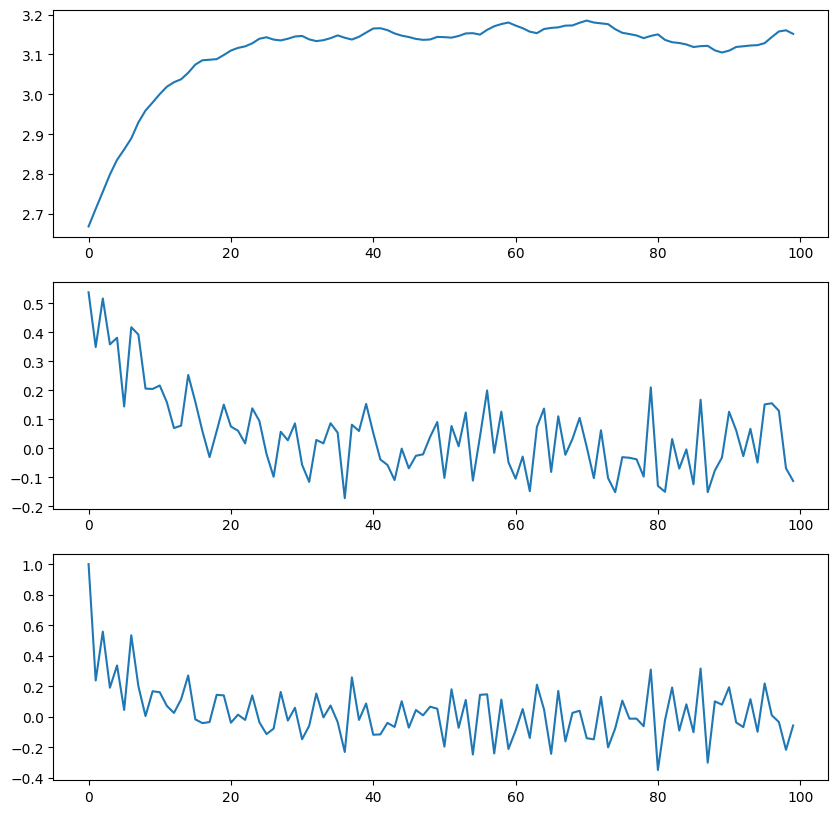

In [7]:
fig, axs = plt.subplots(3,1, figsize=(10, 10))
axs[0].plot(traj_LQR2[0, :])
axs[1].plot(traj_LQR2[1, :])
axs[2].plot(trajU_LQR2[0, :])

## Swing up using Energy Based Control

In [8]:
X0 = np.array([[-0.01],
                [0]])

full_state = np.squeeze(X0)
ctrl = Controller(Ad, Bd, pend.m, pend.g, pend.l)

### Swing up with k = 0.1

In [9]:
full_state = np.squeeze(X0)
timesteps = 100
k = 0.1

traj_Swing1 = np.zeros((2, timesteps))
trajU_Swing1 = np.zeros((1, timesteps))

for i in range(timesteps):

    fs = full_state[:, np.newaxis]

    if(full_state[0]>3*np.pi/4 and full_state[0]<5*np.pi/4):
        u_ctrl = np.squeeze(K@(fs - Xeq)) + np.random.normal(0, 0.2)
        u_ctrl = np.clip(u_ctrl, -1, 1)

    else:
        u_ctrl = ctrl.SwingUp(full_state[0], full_state[1], k) + np.random.normal(0, 0.1)
        u_ctrl = np.clip(u_ctrl, -1, 1)

    full_state = sim.step(full_state, u_ctrl)
    traj_Swing1[:, i] = full_state
    trajU_Swing1[:, i] = u_ctrl

### Plots

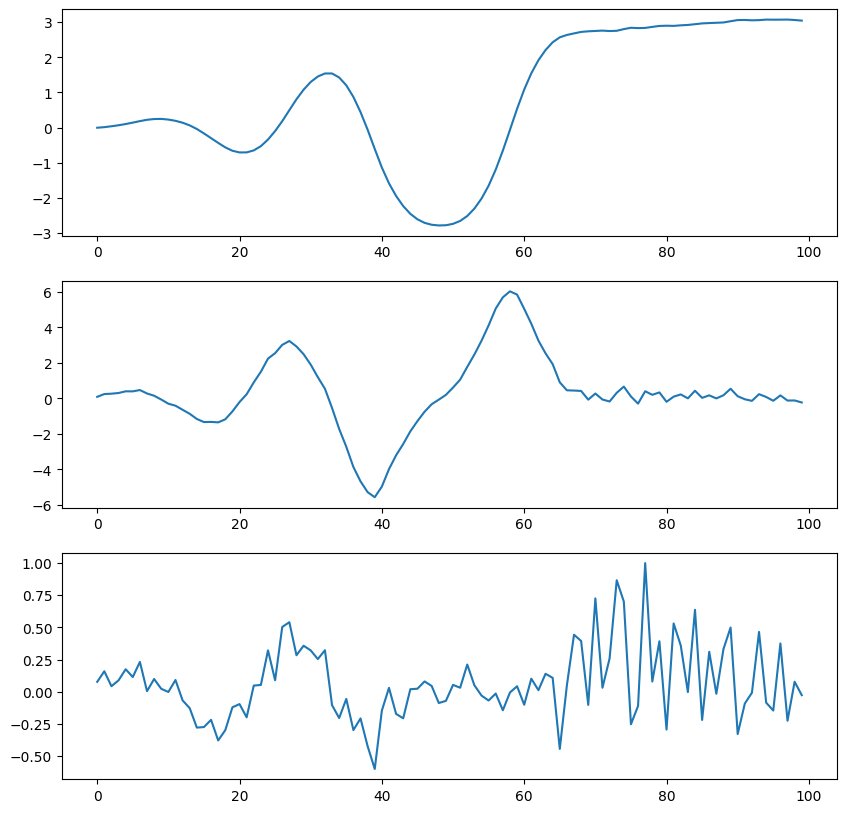

In [10]:
fig, axs = plt.subplots(3,1, figsize=(10, 10))
axs[0].plot(traj_Swing1[0, :])
axs[1].plot(traj_Swing1[1, :])
axs[2].plot(trajU_Swing1[0, :])

### Swing up with k = 0.13

In [11]:
full_state = np.squeeze(X0)
timesteps = 100
k = 0.13

traj_Swing2 = np.zeros((2, timesteps))
trajU_Swing2 = np.zeros((1, timesteps))

for i in range(timesteps):

    fs = full_state[:, np.newaxis]

    if(full_state[0]>3*np.pi/4 and full_state[0]<5*np.pi/4):
        u_ctrl = np.squeeze(K@(fs - Xeq)) + np.random.normal(0, 0.2)
        u_ctrl = np.clip(u_ctrl, -1, 1)

    else:
        u_ctrl = ctrl.SwingUp(full_state[0], full_state[1], k) + np.random.normal(0, 0.2)

    full_state = sim.step(full_state, u_ctrl)
    traj_Swing2[:, i] = full_state
    trajU_Swing2[:, i] = u_ctrl

### Plots

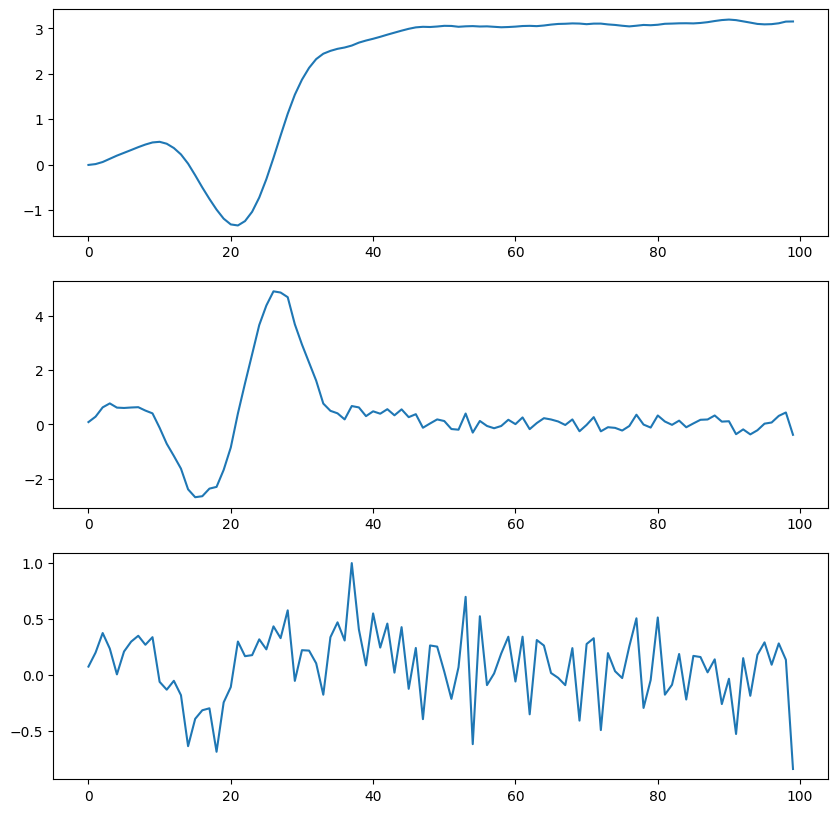

In [12]:
fig, axs = plt.subplots(3,1, figsize=(10, 10))
axs[0].plot(traj_Swing2[0, :])
axs[1].plot(traj_Swing2[1, :])
axs[2].plot(trajU_Swing2[0, :])

# Random Inputs

In [13]:
X0 = np.array([[0],
                [0]])

full_state = np.squeeze(X0)
timesteps = 100

traj_random = np.zeros((2, timesteps))
trajU_random = np.zeros((1, timesteps))

for i in range(timesteps):

    fs = full_state[:, np.newaxis]

    u_ctrl = np.random.normal(0, 0.5, (1,1))

    full_state = sim.step(full_state, np.squeeze(u_ctrl))
    traj_random[:, i] = full_state
    trajU_random[:, i] = u_ctrl

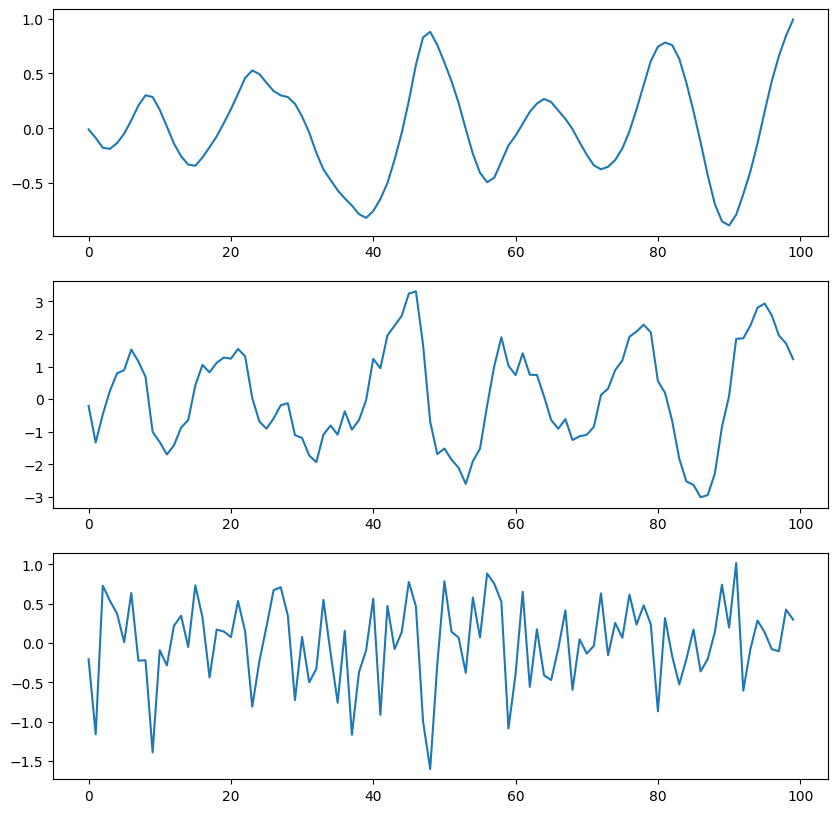

In [14]:
fig, axs = plt.subplots(3,1, figsize=(10, 10))
axs[0].plot(traj_random[0, :])
axs[1].plot(traj_random[1, :])
axs[2].plot(trajU_random[0, :])

## Constructing the Hankel Matrices from each trajectory

In [15]:
from DeePC_utils import *
from DeePC import *

Tini = 20
L = 60
T = 100
nx = 2
nu = 1

u_lim = (-0.75, 0.75)

Hx1 = createHankel(traj_LQR1, L, T)
Hx2 = createHankel(traj_LQR2, L, T)
Hx3 = createHankel(traj_Swing1, L, T)
Hx4 = createHankel(traj_Swing2, L, T)
Hx5 = createHankel(traj_random, L, T)

Hu1 = createHankel(trajU_LQR1, L, T)
Hu2 = createHankel(trajU_LQR2, L, T)
Hu3 = createHankel(trajU_Swing1, L, T)
Hu4 = createHankel(trajU_Swing2, L, T)
Hu5 = createHankel(trajU_random, L, T)

Y = mergedHankel((Hx1, Hx2, Hx3, Hx4))
U = mergedHankel((Hu1, Hu2, Hu3, Hu4))

In [16]:
Yp, Yf = splitHankel(Y, Tini, L, nx)
Up, Uf = splitHankel(U, Tini, L, nu)

## Parameters for DeePC

In [29]:
Q = np.zeros(Yf.shape[0])
Q[::2] = 2000
R = np.ones(Uf.shape[0])*10
lamda_g = 60
lamda_s = 500

# lamda_s=500, lamda_g=25, q=5000 works
# lamda_s=500, lamda_g=25, q=5000/2000, u=10
# lamda_s=500, lamda_g=50, q=200, u=10 with limits

target = np.array([[np.pi],
                   [0]])

deepc = DeePC_Controller(Yp, Yf, Up, Uf)

prob, y_ini, u_ini, ref, g, uf = deepc.OneNormDeePC(Q, R, lamda_g, lamda_s, u_lim)

### Initial Conditions, Reference, and Simulation

In [30]:
import numpy.matlib as mat
X0 = np.array([[0.0],
                [0.0]])

target = np.array([[np.pi],
                      [0]])

reference = ReshapeTraj(mat.repmat(target, 1, L-Tini))
# reference[:20] = np.zeros((20,1))

full_state = np.squeeze(X0)
timesteps = 200

traj = np.zeros((2, timesteps))
trajU = np.zeros((1, timesteps))
traj_Tini = np.zeros((2, Tini)) + X0
trajU_Tini = np.zeros((1, Tini))

G = np.zeros((Yp.shape[1], timesteps))

In [31]:
for i in range(timesteps):

    fs = full_state[:, np.newaxis]
    # reference = np.linspace(fs, target, L-Tini)

    y_ini.value = ReshapeTraj(traj_Tini)
    u_ini.value = ReshapeTraj(trajU_Tini)

    # ref.value = reference
    ref.value = reference

    prob.solve(solver=cv.OSQP, warm_start=True)

    u_ctrl = uf.value[0, :]

    full_state = sim.step(full_state, np.squeeze(u_ctrl))
    
    traj[:, i] = full_state
    trajU[:, i] = u_ctrl

    G[:, i] = np.squeeze(g.value)

    traj_Tini = TimeShift(traj_Tini, full_state[:, np.newaxis])
    trajU_Tini = TimeShift(trajU_Tini, u_ctrl[:, np.newaxis])

C:\Users\rudra104\AppData\Roaming\Python\Python310\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


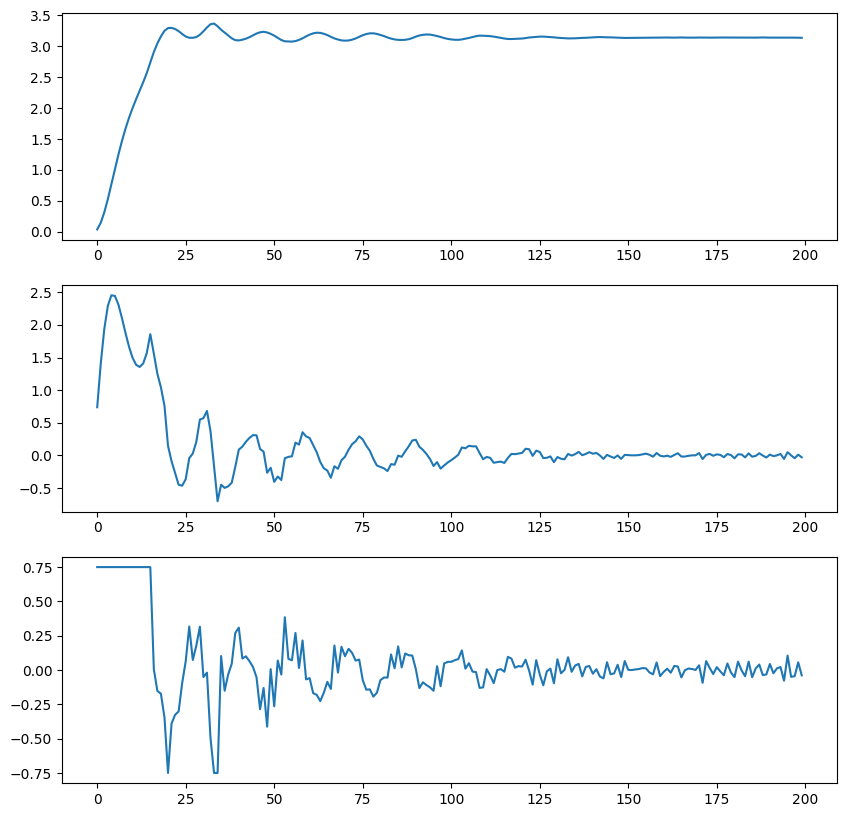

In [32]:
fig, axs = plt.subplots(3,1, figsize=(10, 10))
axs[0].plot(traj[0, :])
axs[1].plot(traj[1, :])
axs[2].plot(trajU[0, :])

## Visualizing the weights for each trajectory over time

<Axes: >

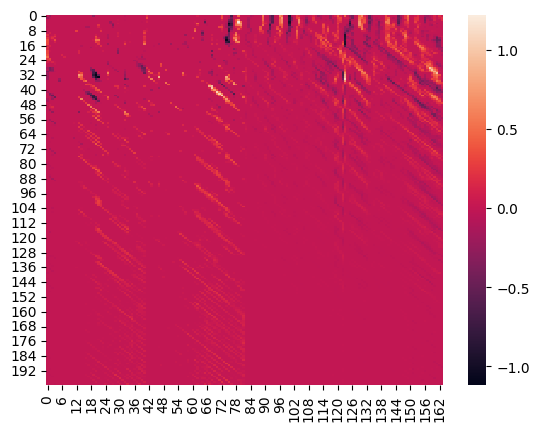

In [33]:
import seaborn as sns
sns.heatmap(G.T)

<Axes: >

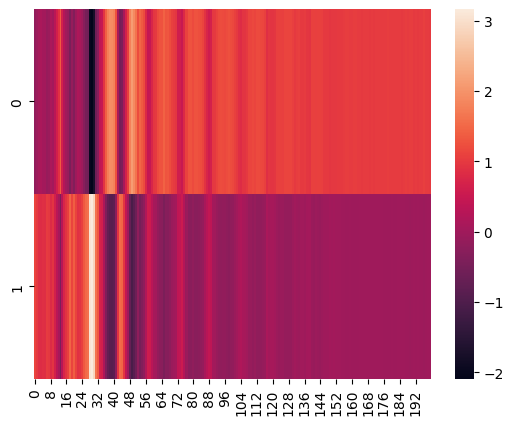

In [34]:
G1 = G[:int(G.shape[0]/2), :]
G2 = G[int(G.shape[0]/2):, :]
M = np.vstack((np.sum(G1, axis=0), np.sum(G2, axis=0)))

sns.heatmap(M)